# Importing libraries

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Changing th default figure size for graphs
font = {"weight": "bold",
        "size": 16}
plt.rcParams["figure.figsize"] = (14,8)
plt.rc("font", **font)

sns.set(style="darkgrid")
sns.set_theme("poster")

# Importing dataset

In [19]:
df = pd.read_excel("california_gas_prices_2000-2023.xlsx")

In [20]:
df.head()

,Date,Weekly California Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


## Renaming gas prices column 

In [21]:
df = df.rename(columns={df.columns[0]: "date", df.columns[1]: "gas_prices_weekly"})
df.head()

,date,gas_prices_weekly
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


# Data cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1185 non-null   datetime64[ns]
 1   gas_prices_weekly  1183 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.6 KB


In [23]:
df[df["gas_prices_weekly"].isna()]

,date,gas_prices_weekly
1183,2023-01-23,NaN
1184,2023-01-30,NaN


- Decided to drop null values as there are only 2 

In [24]:
df = df.dropna()
df.isna().sum()

date                 0
gas_prices_weekly    0
dtype: int64

# Feature Engineering

In [25]:
df.head()

,date,gas_prices_weekly
0,2000-05-22,1.634
1,2000-05-29,1.626
2,2000-06-05,1.613
3,2000-06-12,1.614
4,2000-06-19,1.618


In [26]:
df = df.set_index(df["date"])
df.head()

,date,gas_prices_weekly
date,,
2000-05-22,2000-05-22,1.634
2000-05-29,2000-05-29,1.626
2000-06-05,2000-06-05,1.613
2000-06-12,2000-06-12,1.614
2000-06-19,2000-06-19,1.618


In [27]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week

df.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_10332\3091389194.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["date"].dt.week


,date,gas_prices_weekly,year,month,week
date,,,,,
2000-05-22,2000-05-22,1.634,2000,5,21
2000-05-29,2000-05-29,1.626,2000,5,22
2000-06-05,2000-06-05,1.613,2000,6,23
2000-06-12,2000-06-12,1.614,2000,6,24
2000-06-19,2000-06-19,1.618,2000,6,25


In [28]:
df = df.drop(columns="date")
df.head()

,gas_prices_weekly,year,month,week
date,,,,
2000-05-22,1.634,2000,5,21
2000-05-29,1.626,2000,5,22
2000-06-05,1.613,2000,6,23
2000-06-12,1.614,2000,6,24
2000-06-19,1.618,2000,6,25



# EDA

## Mean price of gas per year

In [29]:
mean_year = df.groupby(["year"]).mean()["gas_prices_weekly"]

Text(0, 0.5, 'Amount in USD ($)')

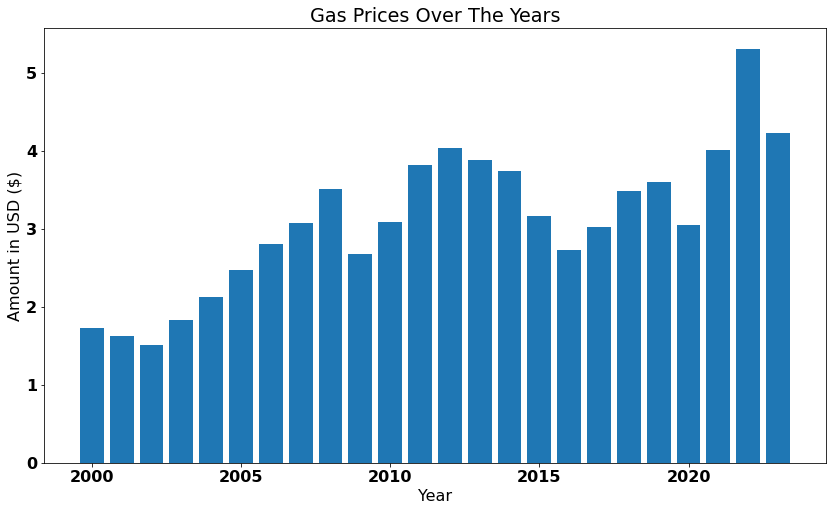

In [30]:
plt.bar(mean_year.index, mean_year[:])
plt.title("Gas Prices Over The Years")
plt.xlabel("Year")
plt.ylabel("Amount in USD ($)")

- A clear trend is gas prices continue to rise.

- The general trend seems to be that gas steadily rises to new heights then takes a hit and falls. Then continues the same pattern over the years.

- We must also take under consideration that the covid-19 pandemic in 2020 gas went down.

## Mean price for gas in per month

In [31]:
mean_month = df.groupby(["month"]).mean()["gas_prices_weekly"]

In [38]:
mean_month

month
1     2.831660
2     2.871753
3     3.108361
4     3.207695
5     3.279182
6     3.245694
7     3.174980
8     3.156510
9     3.145786
10    3.150476
11    2.999082
12    2.810667
Name: gas_prices_weekly, dtype: float64

In [46]:
month_index = ["January", "February", "March", "April", "May", "June", "July",
              "August", "September", "October", "November", "December"]
mean_month = mean_month.set_axis(month_index)

Text(0, 0.5, 'Gas Price USD ($)')

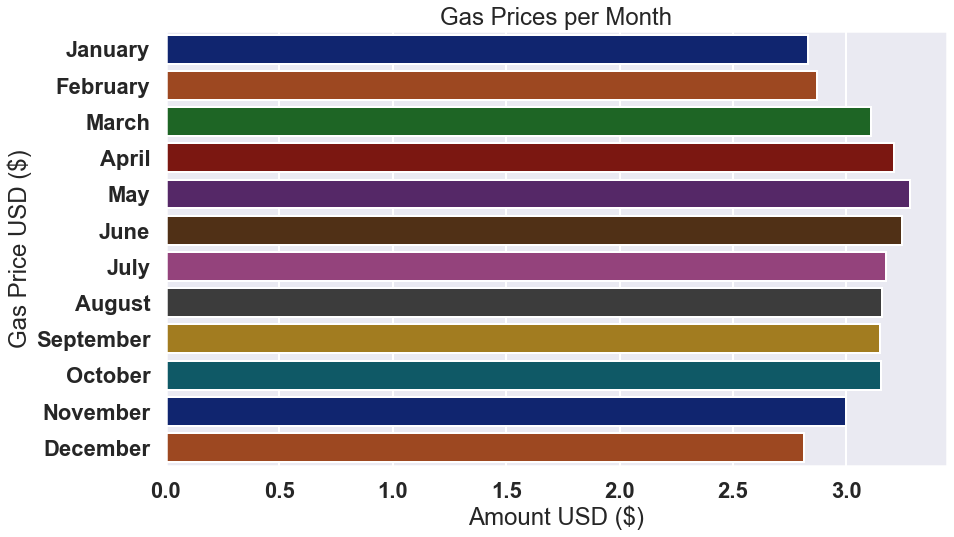

In [105]:
sns.barplot(y=mean_month.index, x=mean_month[:], palette="dark")
plt.title("Gas Prices per Month")
plt.xlabel("Amount USD ($)")
plt.ylabel("Gas Price USD ($)")

## Price of gas during Holidays (Thanksgiving, Christmas, New Years) 2015-2019

In [101]:
# Slicing the holiday season
holiday_df = df.loc[(df["week"] >= 45) | (df["week"] == 1)]
holiday_df = holiday_df.loc["2000": "2019"]
holiday_df.tail()

,gas_prices_weekly,year,month,week
date,,,,
2019-12-02,3.674,2019,12,49
2019-12-09,3.580,2019,12,50
2019-12-16,3.508,2019,12,51
2019-12-23,3.457,2019,12,52
2019-12-30,3.438,2019,12,1
